# Porter Flights

In [ ]:
import os
import datetime

import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [22]:
df = pd.read_csv('YTZ_departures_2019.csv')

In [23]:
# drop rows with only NaN
df.dropna(axis=1, how = 'all', inplace=True)

In [24]:
fl_df = df.copy()

In [25]:
wxx_df = pd.read_csv('WXX.csv')

In [192]:
wxx_yow = pd.read_csv('YOW.csv')

In [193]:
wxx_ytz = pd.read_csv('YTZ.csv')

In [194]:
wxx_ytz.keys()

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location'],
      dtype='object')

In [195]:
wxx_yow = wxx_yow.drop(columns=['sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'maxtempC', 'mintempC'])

In [196]:
wxx_ytz = wxx_ytz.drop(columns=['sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'maxtempC', 'mintempC'])

In [197]:
wxx_ytz.rename(columns={'date_time':'date_time', 'totalSnow_cm': 'YTZ snowcm', 'WindGustKmph':'YTZ WindGustKmph',
       'cloudcover':'YTZ cloudcover', 'humidity':'YTZ humidity', 'precipMM': 'YTZ precipMM', 'pressure': 'YTZ pressure', 'tempC':'YTZ tempC',
        'visibility':'YTZ visibility', 'winddirDegree':'YTZ winddir', 'windspeedKmph':'YTZ windspeedKmph', 'location':'location'})

,date_time,YTZ snowcm,YTZ WindGustKmph,YTZ cloudcover,YTZ humidity,YTZ precipMM,YTZ pressure,YTZ tempC,YTZ visibility,YTZ winddir,YTZ windspeedKmph,location
0,2019-01-01 00:00:00,0.0,35,100,83,2.1,1005,-3,8,163,17,YTZ
1,2019-01-01 01:00:00,0.0,38,95,85,1.0,1003,-1,8,198,17,YTZ
2,2019-01-01 02:00:00,0.0,41,90,87,0.1,1001,1,8,233,18,YTZ
3,2019-01-01 03:00:00,0.0,44,85,89,0.1,999,4,8,268,19,YTZ
4,2019-01-01 04:00:00,0.0,42,75,87,0.0,1000,3,8,284,19,YTZ
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,0.3,27,95,71,0.0,1001,1,6,264,21,YTZ
8756,2019-12-31 20:00:00,0.3,27,90,70,0.0,1001,0,8,265,21,YTZ
8757,2019-12-31 21:00:00,0.3,27,85,70,0.0,1002,0,10,267,21,YTZ
8758,2019-12-31 22:00:00,0.3,30,66,72,0.0,1002,0,10,265,23,YTZ


In [198]:
wxx_yow.rename(columns={'date_time':'date_time', 'totalSnow_cm': 'YOW snowcm', 'WindGustKmph':'YOW WindGustKmph',
       'cloudcover':'YOW cloudcover', 'humidity':'YOW humidity', 'precipMM': 'YOW precipMM', 'pressure': 'YOW pressure', 'tempC':'YOW tempC',
        'visibility':'YOW visibility', 'winddirDegree':'YOW winddir', 'windspeedKmph':'YOW windspeedKmph', 'location':'location'})

,date_time,YOW snowcm,YOW WindGustKmph,YOW cloudcover,YOW humidity,YOW precipMM,YOW pressure,YOW tempC,YOW visibility,YOW winddir,YOW windspeedKmph,location
0,2019-01-01 00:00:00,10.5,30,100,82,2.2,1007,-9,4,84,19,YOW
1,2019-01-01 01:00:00,10.5,30,100,86,1.1,1006,-7,5,77,17,YOW
2,2019-01-01 02:00:00,10.5,29,100,91,2.0,1006,-6,6,70,15,YOW
3,2019-01-01 03:00:00,10.5,29,100,95,2.7,1006,-5,7,63,13,YOW
4,2019-01-01 04:00:00,10.5,29,100,95,1.3,1005,-5,6,83,13,YOW
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,14.3,14,98,97,0.1,998,0,3,196,9,YOW
8756,2019-12-31 20:00:00,14.3,15,97,97,0.2,998,-1,3,213,9,YOW
8757,2019-12-31 21:00:00,14.3,15,95,96,0.3,998,-1,2,231,10,YOW
8758,2019-12-31 22:00:00,14.3,17,92,94,0.2,998,-2,3,228,10,YOW


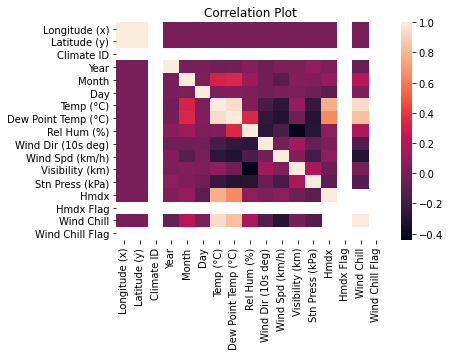

In [199]:
df_corr = wxx_df.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

In [27]:
fl_df.keys()

Index(['flightnumber', 'flightdate', 'departurestation',
       'departurestationregular', 'arrivalstation', 'arrivalstationregular',
       'citypair', 'citypairregular', 'citypairordered',
       'citypairregularordered', 'sdt', 'sat', 'outtime', 'offtime', 'ontime',
       'intime', 'odsdeparturestation', 'odsarrivalstation', 'odscitypair',
       'odscitypairordered', 'odsstatus', 'odssdt', 'odssat',
       'odsmodifieddatetime', 'blockscheduled', 'blockactual',
       'blockvsscheduled', 'b0flag', 'flightactual', 'taxiout', 'taxiin',
       'departurevsscheduled', 'd0flag', 'd15flag',
       'departureoveralldelaytime', 'departureoveralldelaycode',
       'departureoveralldelaydescription', 'departureoveralldelaycontrollable',
       'departureoveralldelaymaintenance', 'departureoveralldelaycategory',
       'departuredelaycode1', 'departuredelaytime1',
       'departuredelaycontrollable1', 'departuredelaydescription1',
       'departuredelaycode2', 'departuredelaytime2',
       '

In [28]:
# Define function to identify columns with missing values
def missing_vals(x):
    total = x.isnull().sum().sort_values(ascending=False)
    percent = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [29]:
fl_df['actualflighttype'].value_counts()

SCHD      24330
SCHD X      810
GRDT        112
FERY         31
AIRT         30
DIVC         17
DIVH         11
TECH          4
STBO          3
TRAN          3
CHAR          1
OVRF          1
Name: actualflighttype, dtype: int64

In [172]:
cxl = fl_df[fl_df['actualflighttype'] == 'SCHD X']

In [200]:
flights = fl_df[fl_df['actualflighttype'] == 'SCHD']

In [32]:
missing_vals(flights)

,Total,Percent
arrivaldelaydescription2,23813,0.978751
arrivaldelaycode2,23813,0.978751
departuredelaycode3,23743,0.975873
departuredelaydescription3,23743,0.975873
departuredelaycode2,19922,0.818824
...,...,...
departuredelaytime2,0,0.000000
actualflighttype,0,0.000000
departuredelaycontrollable1,0,0.000000
departuredelaytime1,0,0.000000


In [33]:
flights

,flightnumber,flightdate,departurestation,departurestationregular,arrivalstation,arrivalstationregular,citypair,citypairregular,citypairordered,citypairregularordered,...,scheduledflightcount,flownflightcount,revenuepassengercount,charterflightflag,ferryflightflag,registrationnumber,tailnumber,uncorrectedtailnumber,actualflighttype,operated_flight_forfuel
0,139,1/1/2019,YTZ,YTZ,EWR,EWR,YTZEWR,YTZEWR,EWRYTZ,EWRYTZ,...,1,1,73.0,0,0,KQH,828,828.0,SCHD,1
1,141,1/1/2019,YTZ,YTZ,EWR,EWR,YTZEWR,YTZEWR,EWRYTZ,EWRYTZ,...,1,1,74.0,0,0,LQC,802,802.0,SCHD,1
2,391,1/1/2019,YTZ,YTZ,MDW,MDW,YTZMDW,YTZMDW,MDWYTZ,MDWYTZ,...,1,1,69.0,0,0,LQL,810,810.0,SCHD,1
3,460,1/2/2019,YTZ,YTZ,YQT,YQT,YTZYQT,YTZYQT,YQTYTZ,YQTYTZ,...,1,1,62.0,0,0,LQZ,820,820.0,SCHD,1
4,513,1/2/2019,YTZ,YTZ,YQB,YQB,YTZYQB,YTZYQB,YQBYTZ,YQBYTZ,...,1,1,66.0,0,0,LQK,809,809.0,SCHD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25348,265,12/30/2019,YTZ,YTZ,YOW,YOW,YTZYOW,YTZYOW,YOWYTZ,YOWYTZ,...,1,1,58.0,0,0,LQE,804,804.0,SCHD,1
25349,541,12/30/2019,YTZ,YTZ,YSB,YSB,YTZYSB,YTZYSB,YSBYTZ,YSBYTZ,...,1,1,7.0,0,0,LQJ,808,808.0,SCHD,1
25350,727,12/30/2019,YTZ,YTZ,IAD,IAD,YTZIAD,YTZIAD,IADYTZ,IADYTZ,...,1,1,65.0,0,0,KQF,826,826.0,SCHD,1
25351,947,12/30/2019,YTZ,YTZ,BOS,BOS,YTZBOS,YTZBOS,BOSYTZ,BOSYTZ,...,1,1,65.0,0,0,LQV,817,817.0,SCHD,1


In [47]:
flights['citypair'].value_counts()

YTZYOW    5067
YTZYUL    4097
YTZEWR    4011
YTZYQT    2071
YTZBOS    1974
YTZMDW    1589
YTZYQG    1186
YTZIAD    1044
YTZYAM     952
YTZYSB     905
YTZYTS     792
YTZYQB     443
YTZYTM      64
YTZYHZ      62
YTZMYR      29
YTZMLB      21
YTZYQA      21
YTZYOO       1
YTZYRQ       1
Name: citypair, dtype: int64

In [34]:
cxl

,flightnumber,flightdate,departurestation,departurestationregular,arrivalstation,arrivalstationregular,citypair,citypairregular,citypairordered,citypairregularordered,...,scheduledflightcount,flownflightcount,revenuepassengercount,charterflightflag,ferryflightflag,registrationnumber,tailnumber,uncorrectedtailnumber,actualflighttype,operated_flight_forfuel
20,141,1/2/2019,YTZ,YTZ,EWR,EWR,YTZEWR,YTZEWR,EWRYTZ,EWRYTZ,...,1,0,0.0,0,0,LQX,818,-43621.49306,SCHD X,0
27,483,1/3/2019,YTZ,YTZ,YUL,YUL,YTZYUL,YTZYUL,YTZYUL,YTZYUL,...,1,0,0.0,0,0,LQV,817,-43621.28125,SCHD X,0
55,271,1/7/2019,YTZ,YTZ,YOW,YOW,YTZYOW,YTZYOW,YOWYTZ,YOWYTZ,...,1,0,0.0,0,0,LQJ,808,-43620.47222,SCHD X,0
61,615,1/7/2019,YTZ,YTZ,YTS,YTS,YTZYTS,YTZYTS,YTSYTZ,YTSYTZ,...,1,0,0.0,0,0,LQY,819,-43621.69792,SCHD X,0
84,541,1/7/2019,YTZ,YTZ,YSB,YSB,YTZYSB,YTZYSB,YSBYTZ,YSBYTZ,...,1,0,0.0,0,0,LQY,819,-43621.69792,SCHD X,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25122,483,10/27/2019,YTZ,YTZ,YUL,YUL,YTZYUL,YTZYUL,YTZYUL,YTZYUL,...,1,0,0.0,0,0,KQB,822,-43605.90278,SCHD X,0
25130,450,10/29/2019,YTZ,YTZ,YQG,YQG,YTZYQG,YTZYQG,YQGYTZ,YQGYTZ,...,1,0,0.0,0,0,LQF,805,-43620.55556,SCHD X,0
25147,123,11/3/2019,YTZ,YTZ,EWR,EWR,YTZEWR,YTZEWR,EWRYTZ,EWRYTZ,...,1,0,0.0,0,0,LQF,805,-43620.55556,SCHD X,0
25241,465,12/1/2019,YTZ,YTZ,YUL,YUL,YTZYUL,YTZYUL,YTZYUL,YTZYUL,...,1,0,1.0,0,0,LQV,817,-43621.28125,SCHD X,0


In [60]:
flights['daily_total_flt'] = flights[flights.groupby('flightdate').agg('count').reset_index(name)]

,flightnumber,departurestation,arrivalstation,citypair,sdt,sat,departurevsscheduled,d0flag,d15flag,departureoveralldelaytime
0,65,65,65,65,65,65,65,65,65,65
1,65,65,65,65,65,65,65,65,65,65
2,65,65,65,65,65,65,65,65,65,65
3,73,73,73,73,73,73,73,73,73,73
4,73,73,73,73,73,73,73,73,73,73
...,...,...,...,...,...,...,...,...,...,...
25348,66,66,66,66,66,66,66,66,66,66
25349,66,66,66,66,66,66,66,66,66,66
25350,66,66,66,66,66,66,66,66,66,66
25351,66,66,66,66,66,66,66,66,66,66


In [201]:
flights = flights[['flightnumber', 'flightdate', 'departurestation',
         'arrivalstation', 'citypair',  'sdt', 'sat', 'departurevsscheduled', 
         'departureoveralldelaytime',  ]]

In [51]:
flights['daily_flt_total'] = flights[flights.groupby['flightdate'].count()]

TypeError: 'method' object is not subscriptable

In [36]:
flights['departureoveralldelaycode'].value_counts()

KeyError: 'departureoveralldelaycode'

In [37]:
# drop rows with only NaN
flights.dropna(axis=1, how = 'all', inplace=True)

<ipython-input-37-bd42aec4be83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights.dropna(axis=1, how = 'all', inplace=True)


In [38]:
missing_vals(flights)

,Total,Percent
departureoveralldelaytime,0,0.0
d15flag,0,0.0
d0flag,0,0.0
departurevsscheduled,0,0.0
sat,0,0.0
sdt,0,0.0
citypair,0,0.0
arrivalstation,0,0.0
departurestation,0,0.0
flightdate,0,0.0


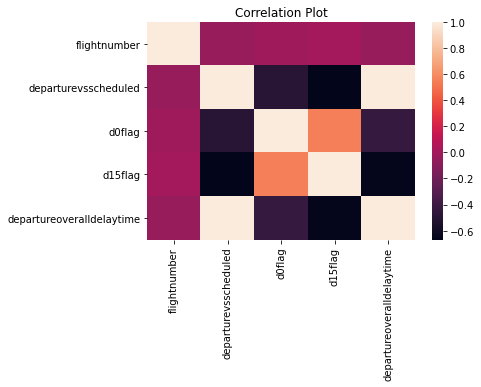

In [185]:
df_corr = flights.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

In [ ]:
flights.sort_values(by='d0flag')

In [ ]:
flights.dtypes

In [202]:
ytz_yow = flights[flights['citypair']== 'YTZYOW']

In [78]:
ytz_yow

,flightnumber,flightdate,departurestation,arrivalstation,citypair,sdt,sat,departurevsscheduled,d0flag,d15flag,departureoveralldelaytime
5,219,1/3/2019,YTZ,YOW,YTZYOW,1/3/19 10:30,1/3/19 11:29,20.0,0.0,0.0,20
13,203,1/2/2019,YTZ,YOW,YTZYOW,1/2/19 6:45,1/2/19 7:44,11.0,0.0,1.0,11
14,249,1/2/2019,YTZ,YOW,YTZYOW,1/2/19 20:29,1/2/19 21:28,35.0,0.0,0.0,35
21,213,1/2/2019,YTZ,YOW,YTZYOW,1/2/19 8:30,1/2/19 9:29,14.0,0.0,1.0,14
22,229,1/2/2019,YTZ,YOW,YTZYOW,1/2/19 12:50,1/2/19 13:49,14.0,0.0,1.0,14
...,...,...,...,...,...,...,...,...,...,...,...
25315,1269,12/19/2019,YTZ,YOW,YTZYOW,12/19/19 18:55,12/19/19 19:54,23.0,0.0,0.0,23
25336,205,12/27/2019,YTZ,YOW,YTZYOW,12/27/19 6:45,12/27/19 7:44,1.0,0.0,1.0,1
25340,249,12/28/2019,YTZ,YOW,YTZYOW,12/28/19 14:30,12/28/19 15:29,6.0,0.0,1.0,6
25347,229,12/30/2019,YTZ,YOW,YTZYOW,12/30/19 12:45,12/30/19 13:44,24.0,0.0,0.0,24


In [203]:
ytz_yow = ytz_yow.sort_values(by = 'sdt')
ytz_yow['date_time'] = ytz_yow['sdt'].astype(str).str[0:-2] + ('00:00')
ytz_yow['date_time'] = pd.to_datetime(ytz_yow['date_time'])
ytz_yow['date_time'] = ytz_yow['date_time'].dt.strftime('%Y-%m-%d %H:%M')
ytz_yow['date_time'] = ytz_yow['date_time'].astype(str)
ytz_yow['date_time'] = pd.to_datetime(ytz_yow.date_time)

In [204]:
wxx_ytz['date_time'] = pd.to_datetime(wxx_ytz['date_time'])
wxx_ytz['date_time'] = wxx_ytz['date_time'].dt.strftime('%Y-%m-%d %H:%M')
wxx_ytz['date_time'] = wxx_ytz['date_time'].astype(str)
wxx_ytz['date_time'] = pd.to_datetime(wxx_ytz.date_time)

In [205]:
wxx_yow['date_time'] = pd.to_datetime(wxx_yow['date_time'])
wxx_yow['date_time'] = wxx_yow['date_time'].dt.strftime('%Y-%m-%d %H:%M')
wxx_yow['date_time'] = wxx_yow['date_time'].astype(str)
wxx_yow['date_time'] = pd.to_datetime(wxx_yow.date_time)

In [179]:
wxx_ytz = ytz_yow.sort_values(by='date_time')

In [189]:
ytz_yow

,flightnumber,flightdate,departurestation,arrivalstation,citypair,sdt,sat,departurevsscheduled,d0flag,d15flag,departureoveralldelaytime,date_time
779,219,1/1/2019,YTZ,YOW,YTZYOW,1/1/19 10:30,1/1/19 11:29,29.0,0.0,0.0,29,2019-01-01 10:00:00
4161,225,1/1/2019,YTZ,YOW,YTZYOW,1/1/19 11:30,1/1/19 12:29,15.0,0.0,0.0,15,2019-01-01 11:00:00
170,229,1/1/2019,YTZ,YOW,YTZYOW,1/1/19 12:50,1/1/19 13:49,25.0,0.0,0.0,25,2019-01-01 12:00:00
5485,235,1/1/2019,YTZ,YOW,YTZYOW,1/1/19 13:55,1/1/19 14:54,3.0,0.0,1.0,3,2019-01-01 13:00:00
5486,237,1/1/2019,YTZ,YOW,YTZYOW,1/1/19 14:30,1/1/19 15:29,19.0,0.0,0.0,19,2019-01-01 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
17722,205,9/9/2019,YTZ,YOW,YTZYOW,9/9/19 6:45,9/9/19 7:44,-5.0,1.0,1.0,0,2019-09-09 06:00:00
9453,209,9/9/2019,YTZ,YOW,YTZYOW,9/9/19 7:45,9/9/19 8:44,-1.0,1.0,1.0,0,2019-09-09 07:00:00
8296,211,9/9/2019,YTZ,YOW,YTZYOW,9/9/19 8:15,9/9/19 9:14,8.0,0.0,1.0,8,2019-09-09 08:00:00
17814,215,9/9/2019,YTZ,YOW,YTZYOW,9/9/19 8:45,9/9/19 9:44,-6.0,1.0,1.0,0,2019-09-09 08:00:00


In [190]:
wxx_ytz

,flightnumber,flightdate,departurestation,arrivalstation,citypair,sdt,sat,departurevsscheduled,d0flag,d15flag,departureoveralldelaytime,date_time
97,213,1/1/2019,YTZ,YOW,YTZYOW,1/1/19 8:30,1/1/19 9:29,-11.0,1.0,1.0,0,2019-01-01 08:00:00
169,215,1/1/2019,YTZ,YOW,YTZYOW,1/1/19 9:20,1/1/19 10:19,-9.0,1.0,1.0,0,2019-01-01 09:00:00
779,219,1/1/2019,YTZ,YOW,YTZYOW,1/1/19 10:30,1/1/19 11:29,29.0,0.0,0.0,29,2019-01-01 10:00:00
4161,225,1/1/2019,YTZ,YOW,YTZYOW,1/1/19 11:30,1/1/19 12:29,15.0,0.0,0.0,15,2019-01-01 11:00:00
170,229,1/1/2019,YTZ,YOW,YTZYOW,1/1/19 12:50,1/1/19 13:49,25.0,0.0,0.0,25,2019-01-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
23835,229,12/31/2019,YTZ,YOW,YTZYOW,12/31/19 12:50,12/31/19 13:49,27.0,0.0,0.0,27,2019-12-31 12:00:00
21221,247,12/31/2019,YTZ,YOW,YTZYOW,12/31/19 13:55,12/31/19 14:54,28.0,0.0,0.0,28,2019-12-31 13:00:00
24184,249,12/31/2019,YTZ,YOW,YTZYOW,12/31/19 14:30,12/31/19 15:29,4.0,0.0,1.0,4,2019-12-31 14:00:00
18420,257,12/31/2019,YTZ,YOW,YTZYOW,12/31/19 16:05,12/31/19 17:04,63.0,0.0,0.0,63,2019-12-31 16:00:00


In [209]:
wxx = wxx_ytz.merge(wxx_yow, how='left')

In [212]:
wxx = [wxx_yow, wxx_ytz]
wxx_all = pd.concat(wxx, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [238]:
wxx_all['date_time'] = pd.to_datetime(wxx_all.date_time)
df = ytz_yow.merge(wxx_all, how='left')

In [222]:
df_ytz = ytz_yow.merge(wxx_ytz, how='left')

In [228]:
df_yow = ytz_yow.merge(wxx_yow, how='left')

In [245]:
df_dly = df[df['departureoveralldelaytime'] >0]

In [231]:
dly_yow = df_dly.drop(columns=['departurevsscheduled', 'flightnumber', 'WindGustKmph'])

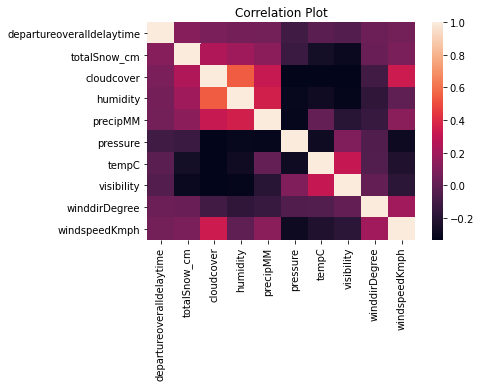

In [232]:
df_corr = dly_yow.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

In [183]:
missing_vals(df_full)

,Total,Percent
location,0,0.0
departureoveralldelaytime,0,0.0
flightdate,0,0.0
departurestation,0,0.0
arrivalstation,0,0.0
citypair,0,0.0
sdt,0,0.0
sat,0,0.0
departurevsscheduled,0,0.0
d0flag,0,0.0


In [187]:
df_full.keys()

Index(['flightnumber', 'flightdate', 'departurestation', 'arrivalstation',
       'citypair', 'sdt', 'sat', 'departurevsscheduled', 'd0flag', 'd15flag',
       'departureoveralldelaytime', 'date_time', 'totalSnow_cm',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location'],
      dtype='object')

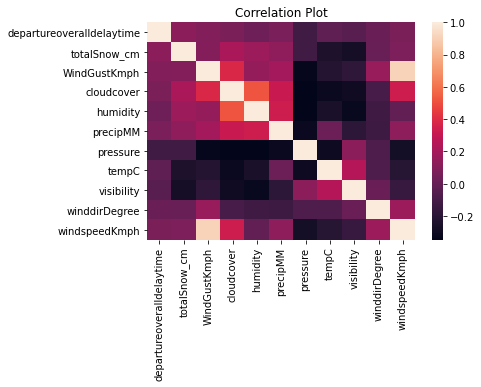

In [243]:
df_corr = df.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

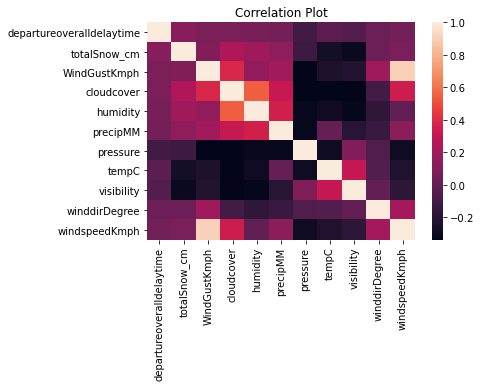

In [246]:
df_corr = df_dly.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

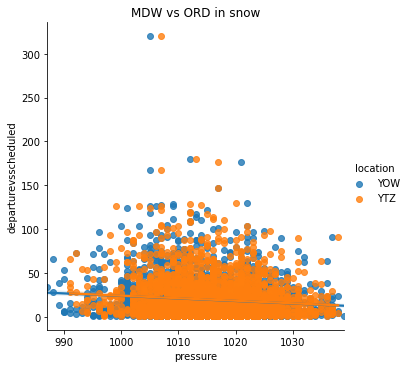

In [221]:
df_plt = sns.lmplot(x='pressure', y='departurevsscheduled', hue= 'location', data=df_dly)
axes = df_plt.axes.flatten()
axes[0].set_title("MDW vs ORD in snow")

plt.show()

In [233]:
from sklearn.preprocessing import StandardScaler

In [242]:
df.dtypes

flightdate                           object
sdt                                  object
sat                                  object
departureoveralldelaytime             int64
date_time                    datetime64[ns]
totalSnow_cm                        float64
WindGustKmph                          int64
cloudcover                            int64
humidity                              int64
precipMM                            float64
pressure                              int64
tempC                                 int64
visibility                            int64
winddirDegree                         int64
windspeedKmph                         int64
location                             object
dtype: object

In [241]:
df = df.drop(columns=['flightnumber', 'departurestation', 'arrivalstation', 'citypair', 'departurevsscheduled' ])